In [22]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# Set Seaborn style
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('/Users/sayansarkar/Downloads/Exercise 4X009/car price.csv')

In [4]:
# 1. Data Inspection and Summary Statistics
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

First 5 rows:
          Id Manufacturer         Model  Prod_Year   Category Leather_Interioe  \
0  45624039         FORD       Mustang       2016  Cabriolet              Yes   
1  45766794   MITSUBISHI        Pajero       1997       Jeep               No   
2  45709646       TOYOTA         RAV 4       2001       Jeep               No   
3  45816588       SUZUKI  Grand Vitara       2008       Jeep               No   
4  45759758   MITSUBISHI   Pajero Mini       2006       Jeep               No   

  Fuel_Type Engine Volume  Kilometers_Driven Gear_Box_Type Drive_Wheel  \
0    Petrol     2.3 Turbo            75000.0     Tiptronic        Rear   
1    Petrol           2.4           142000.0     Automatic         4x4   
2    Petrol             2            91000.0     Automatic         4x4   
3    Petrol           1.6            98000.0     Automatic         4x4   
4    Petrol           0.7           314000.0        Manual         4x4   

  Selling_Date             Wheel   Color  Airbags   P

In [32]:
# 2. Data Cleaning
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # or df.fillna(df.mean(numeric_only=True))

# Outlier removal for price (if not done yet)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]



Missing Values:
 id                   0
manufacturer         0
model                0
prod_year            0
category             0
leather_interioe     0
fuel_type            0
engine_volume        0
kilometers_driven    0
gear_box_type        0
drive_wheel          0
selling_date         0
wheel                0
color                0
airbags              0
price                0
dtype: int64


In [33]:
# Optionally fill or drop missing values (example)
df = df.dropna()

In [34]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                   0
manufacturer         0
model                0
prod_year            0
category             0
leather_interioe     0
fuel_type            0
engine_volume        0
kilometers_driven    0
gear_box_type        0
drive_wheel          0
selling_date         0
wheel                0
color                0
airbags              0
price                0
dtype: int64


In [13]:

print(df.columns)


Index(['id', 'manufacturer', 'model', 'prod_year', 'category',
       'leather_interioe', 'fuel_type', 'engine volume', 'kilometers_driven',
       'gear_box_type', 'drive_wheel', 'selling_date', 'wheel', 'color',
       'airbags', 'price'],
      dtype='object')


In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")



In [15]:

print(df.columns)


Index(['id', 'manufacturer', 'model', 'prod_year', 'category',
       'leather_interioe', 'fuel_type', 'engine_volume', 'kilometers_driven',
       'gear_box_type', 'drive_wheel', 'selling_date', 'wheel', 'color',
       'airbags', 'price'],
      dtype='object')


In [16]:

# Check for outliers (example with 'price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(outliers[['price']])


        price
16     784030
23    1097640
79     594640
97     553900
111    531540
...       ...
4779  1473970
4784   658580
4787  1066270
4794   784030
4797   846750

[240 rows x 1 columns]


<Axes: xlabel='price'>

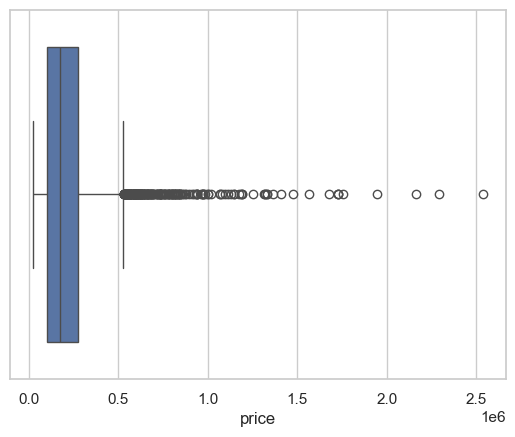

In [17]:
import seaborn as sns
sns.boxplot(x=df['price'])


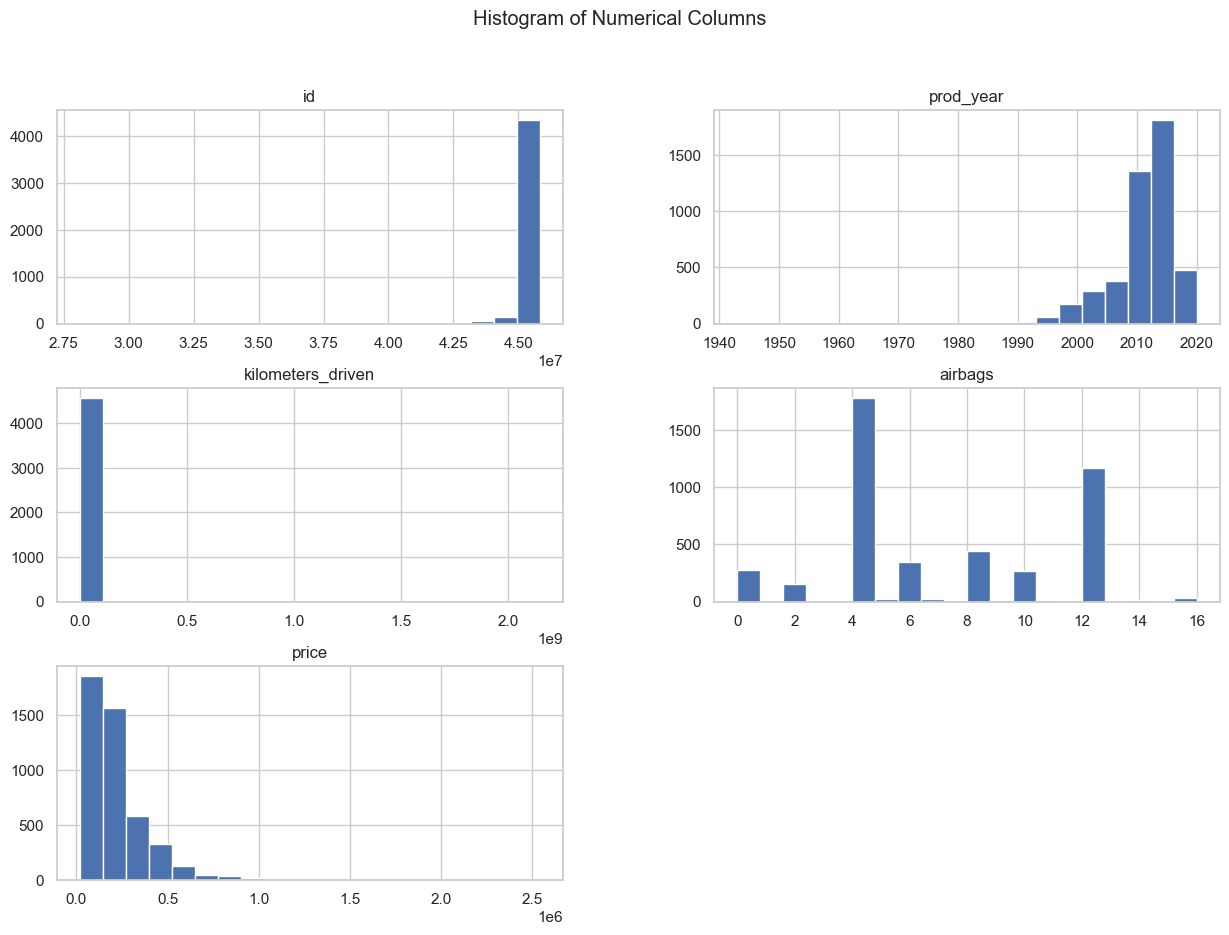

In [18]:
# 3. Univariate Analysis
# Histogram for numerical features
# Create histograms for all numerical columns in the dataframe
# bins=20 sets the number of bins for each histogram
# figsize=(15, 10) sets the overall figure size to 15x10 inches
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Columns')
# Display the plot
plt.show()

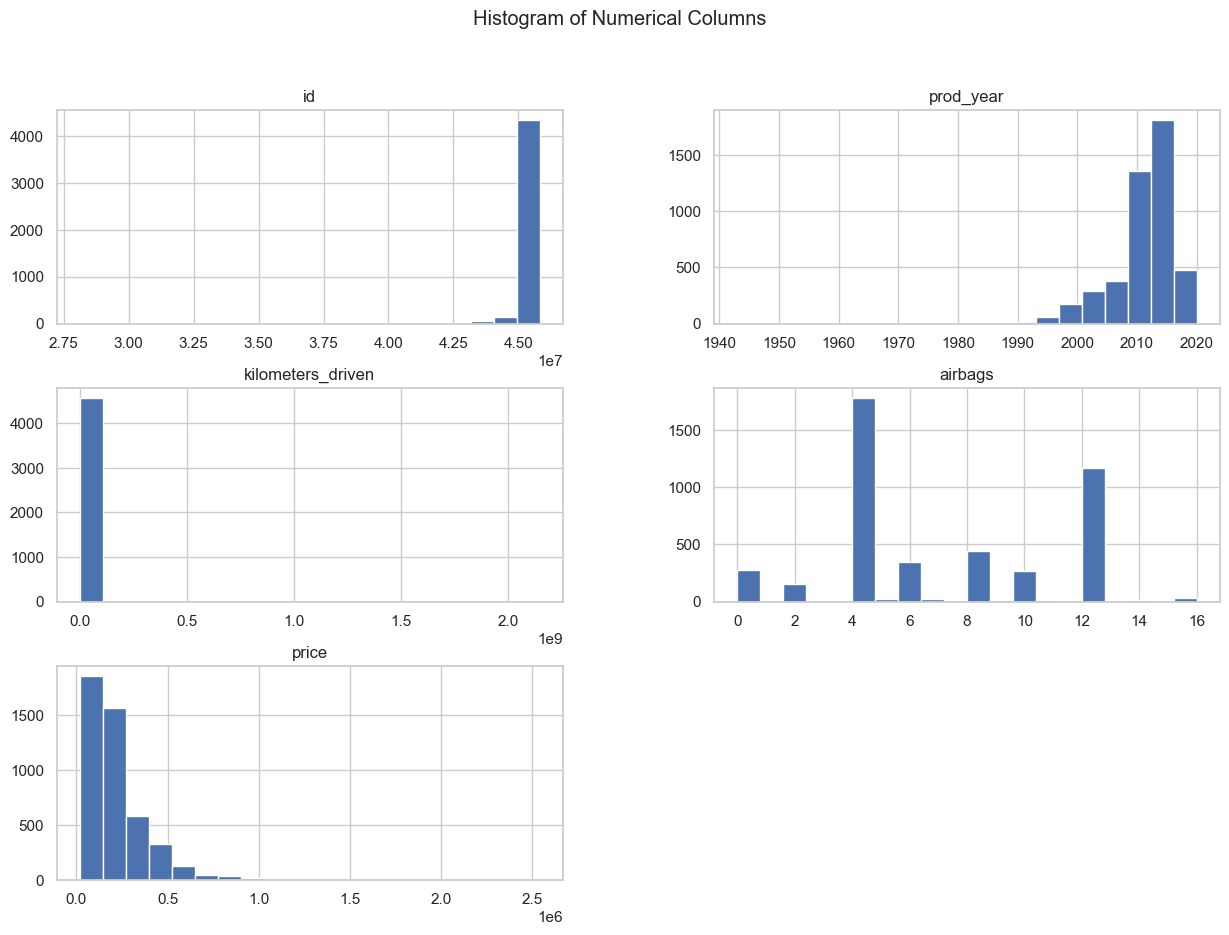

In [18]:
# 3. Univariate Analysis
# Histogram for numerical features
# Create histograms for all numerical columns in the dataframe
# bins=20 sets the number of bins for each histogram
# figsize=(15, 10) sets the overall figure size to 15x10 inches
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Columns')
# Display the plot
plt.show()

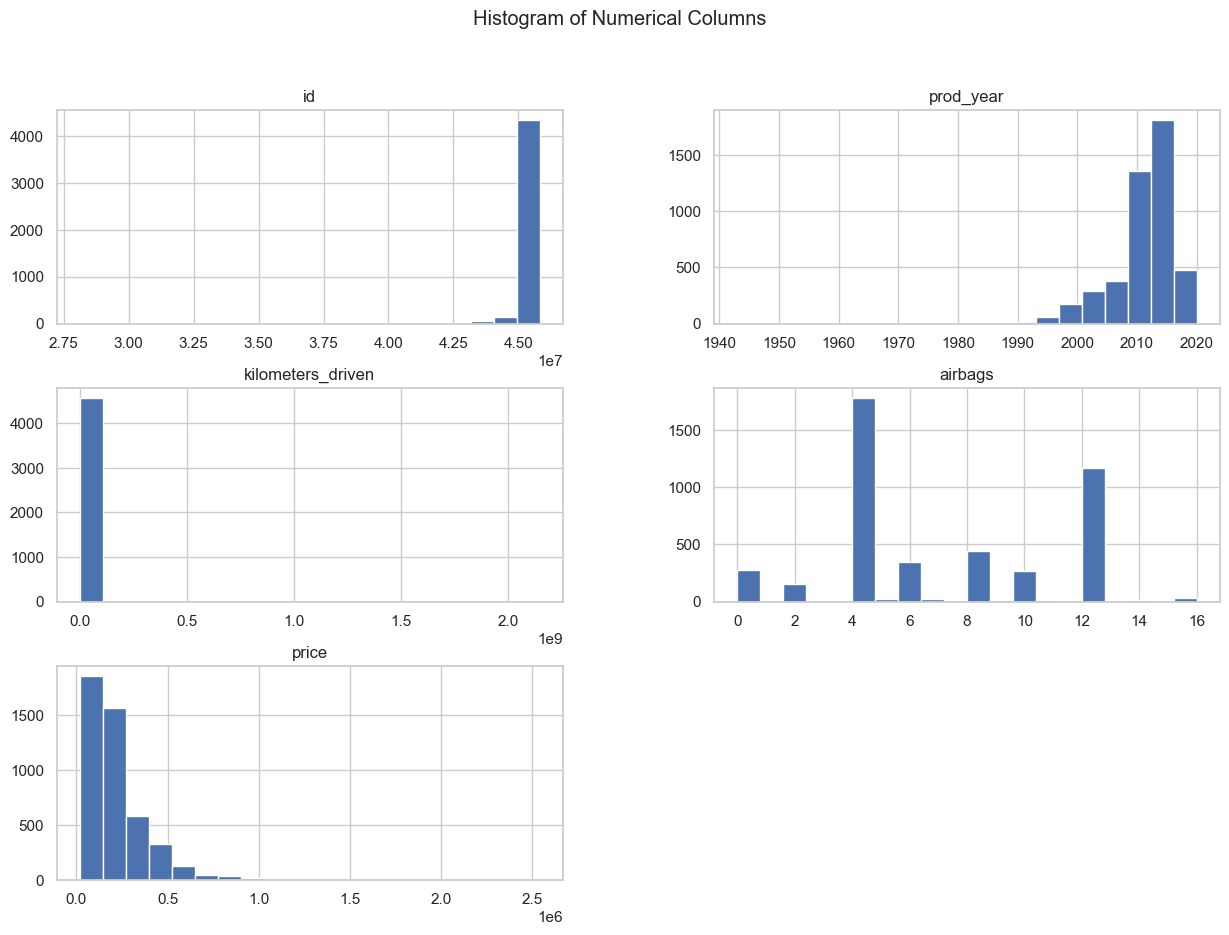

In [18]:
# 3. Univariate Analysis
# Histogram for numerical features
# Create histograms for all numerical columns in the dataframe
# bins=20 sets the number of bins for each histogram
# figsize=(15, 10) sets the overall figure size to 15x10 inches
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Columns')
# Display the plot
plt.show()

In [19]:
print(df.dtypes)


id                     int64
manufacturer          object
model                 object
prod_year              int64
category              object
leather_interioe      object
fuel_type             object
engine_volume         object
kilometers_driven    float64
gear_box_type         object
drive_wheel           object
selling_date          object
wheel                 object
color                 object
airbags              float64
price                  int64
dtype: object


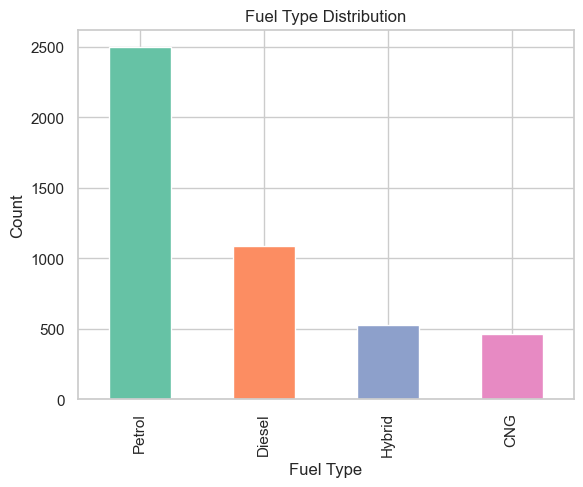

In [31]:
# Bar chart for categorical variable (e.g., fuel type)
df['fuel_type'].value_counts().plot(kind='bar', color=plt.cm.Set2.colors)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


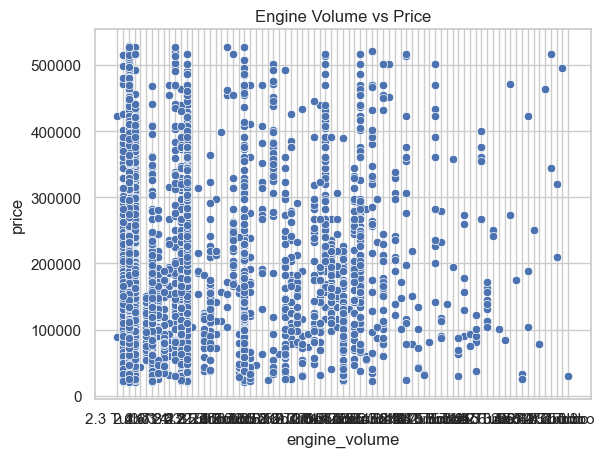

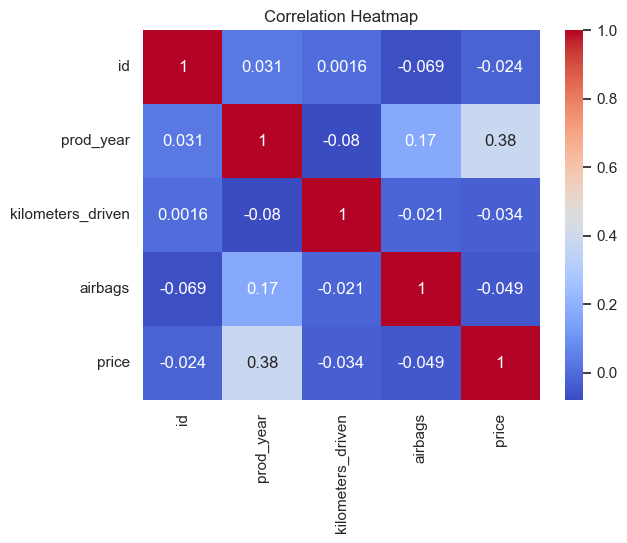

In [35]:
# 4. Bivariate and Multivariate Analysis
# Scatter plot: engine size vs price
sns.scatterplot(x='engine_volume', y='price', data=df)
plt.title('Engine Volume vs Price')
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


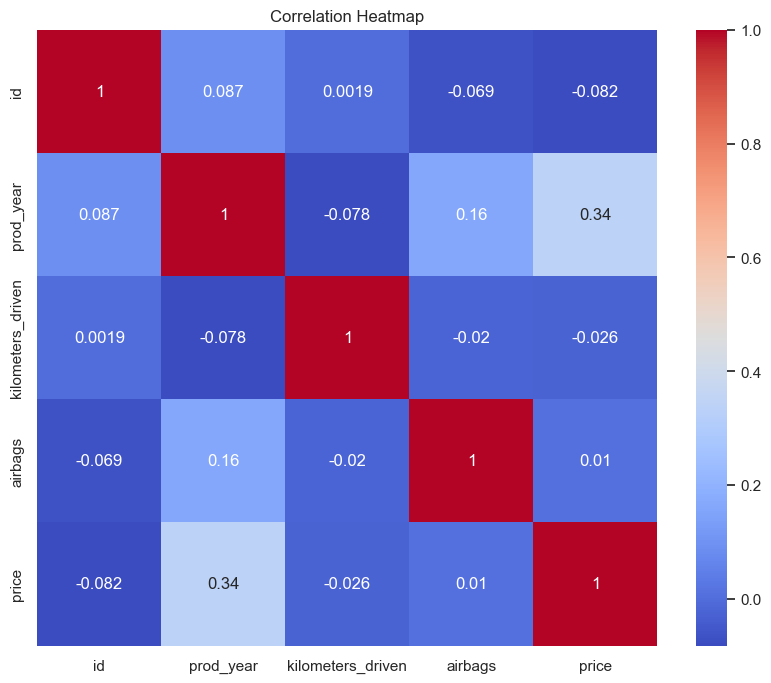

In [28]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


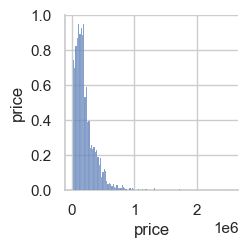

In [30]:

# Pair plot for selected variables
selected_cols = ['price', 'engines_volume', 'fuel_type', 'gear_box_type']
available_cols = [col for col in selected_cols if col in df.columns]
if len(available_cols) > 1:
    sns.pairplot(df[available_cols])
    plt.show()